# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#To install citipy
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_clouds = city_weather["clouds"]["all"]
        city_humidity = city_weather["main"]["humidity"]
        city_wind = city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | nar'yan-mar
Processing Record 3 of Set 1 | bakal
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | vorkuta
Processing Record 6 of Set 1 | kulachi
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | chonchi
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | kone
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | bonthe
Processing Record 17 of Set 1 | camarinas
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | zhangatas
Processing Record 21 of Set 1 | novodvinsk
Processing Record 22 of Set 1 | kailua-kona
Processing Record 23 of Set 

Processing Record 42 of Set 4 | rio grande
Processing Record 43 of Set 4 | krasnokholmskiy
Processing Record 44 of Set 4 | caleta de carquin
Processing Record 45 of Set 4 | bermeo
Processing Record 46 of Set 4 | iskateley
Processing Record 47 of Set 4 | takoradi
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | tadine
Processing Record 0 of Set 5 | bengkulu
Processing Record 1 of Set 5 | el calafate
Processing Record 2 of Set 5 | afaahiti
Processing Record 3 of Set 5 | fuling
Processing Record 4 of Set 5 | nishinoomote
Processing Record 5 of Set 5 | buta
Processing Record 6 of Set 5 | puerto ayora
Processing Record 7 of Set 5 | grand falls-windsor
Processing Record 8 of Set 5 | ortaca
Processing Record 9 of Set 5 | kotlas
Processing Record 10 of Set 5 | ugoofaaru
Processing Record 11 of Set 5 | kirensk
Processing Record 12 of Set 5 | la passe
Processing Record 13 of Set 5 | santana
Processing Record 14 of Set 5 | port lincoln
Processing Record 15 of Set 5 | itoma

Processing Record 32 of Set 8 | at taj
Processing Record 33 of Set 8 | brady
Processing Record 34 of Set 8 | smithers
Processing Record 35 of Set 8 | uribia
Processing Record 36 of Set 8 | az zawiyah
Processing Record 37 of Set 8 | fang
Processing Record 38 of Set 8 | fort riley north
Processing Record 39 of Set 8 | camacupa
Processing Record 40 of Set 8 | lubben
Processing Record 41 of Set 8 | al jumum
Processing Record 42 of Set 8 | taroa
Processing Record 43 of Set 8 | ongjin
Processing Record 44 of Set 8 | zdvinsk
Processing Record 45 of Set 8 | katsuura
Processing Record 46 of Set 8 | kholmsk
Processing Record 47 of Set 8 | susuman
Processing Record 48 of Set 8 | veinticinco de mayo
Processing Record 49 of Set 8 | tarawa
Processing Record 0 of Set 9 | okhotsk
Processing Record 1 of Set 9 | greenville
Processing Record 2 of Set 9 | corumba
Processing Record 3 of Set 9 | urengoy
Processing Record 4 of Set 9 | colonia
Processing Record 5 of Set 9 | mahdia
Processing Record 6 of Set 9

Processing Record 26 of Set 12 | karratha
Processing Record 27 of Set 12 | huaiyuan chengguanzhen
Processing Record 28 of Set 12 | kemijarvi
Processing Record 29 of Set 12 | kandahar
Processing Record 30 of Set 12 | quellon
Processing Record 31 of Set 12 | dumai
Processing Record 32 of Set 12 | palmer
Processing Record 33 of Set 12 | egilsstadir
Processing Record 34 of Set 12 | el jadid
Processing Record 35 of Set 12 | sur
Processing Record 36 of Set 12 | soio
Processing Record 37 of Set 12 | sambava
Processing Record 38 of Set 12 | bowling green
Processing Record 39 of Set 12 | rahimah
Processing Record 40 of Set 12 | ola
Processing Record 41 of Set 12 | matelandia
Processing Record 42 of Set 12 | nuku'alofa
Processing Record 43 of Set 12 | reggane
Processing Record 44 of Set 12 | chivhu
Processing Record 45 of Set 12 | ilhabela
Processing Record 46 of Set 12 | pago pago
Processing Record 47 of Set 12 | bridgewater
Processing Record 48 of Set 12 | ixtapa
Processing Record 49 of Set 12

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,8.45,69,100,2.12,RU,1687870107
1,nar'yan-mar,67.6713,53.0870,10.17,87,100,1.86,RU,1687870108
2,bakal,54.9417,58.8083,17.53,43,27,4.20,RU,1687870108
3,port-aux-francais,-49.3500,70.2167,2.16,82,98,14.69,TF,1687870108
4,vorkuta,67.5000,64.0000,12.41,55,100,2.89,RU,1687870108


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,8.45,69,100,2.12,RU,1687870107
1,nar'yan-mar,67.6713,53.0870,10.17,87,100,1.86,RU,1687870108
2,bakal,54.9417,58.8083,17.53,43,27,4.20,RU,1687870108
3,port-aux-francais,-49.3500,70.2167,2.16,82,98,14.69,TF,1687870108
4,vorkuta,67.5000,64.0000,12.41,55,100,2.89,RU,1687870108


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

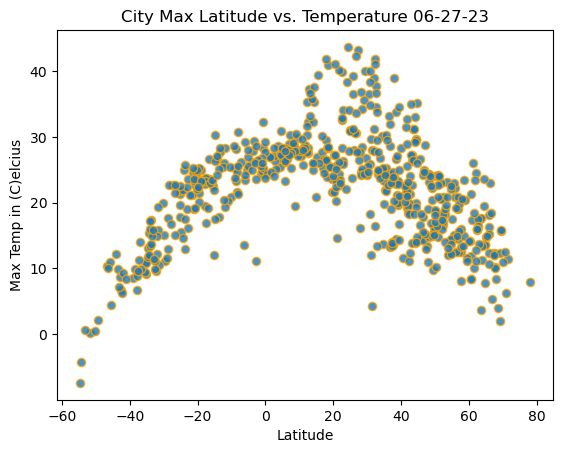

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor = "orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"

)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature {time.strftime('%m-%d-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp in (C)elcius")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

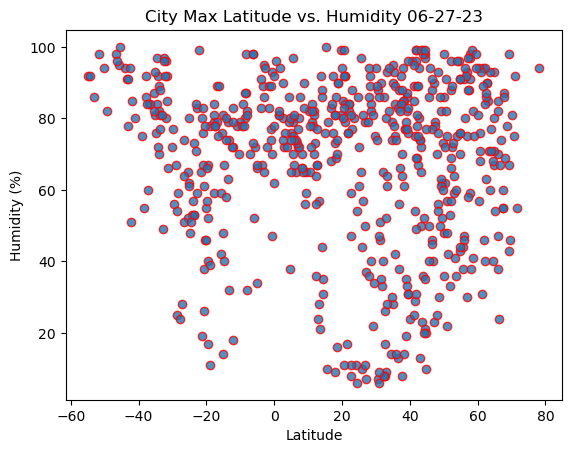

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor = "red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"

)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity {time.strftime('%m-%d-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

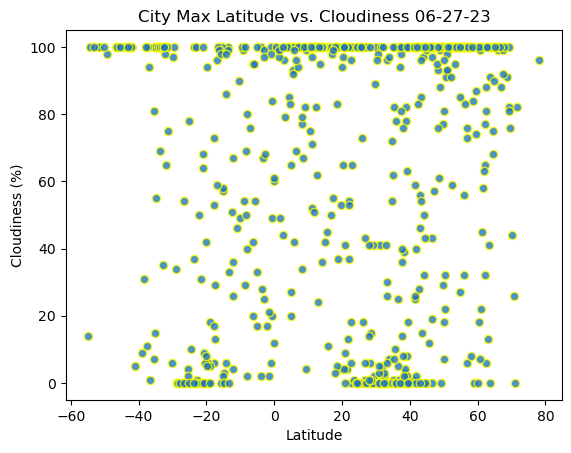

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor = "yellow",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"

)


# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness {time.strftime('%m-%d-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

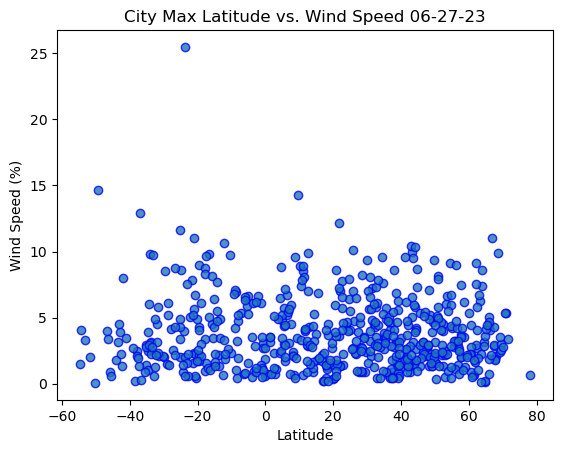

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor = "blue",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"

)


# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed {time.strftime('%m-%d-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    #Compute linear regression
    
    (slope, intercept, rvalue, pvalue, stderr ) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    
    print(f"The r-value is {rvalue **2}")
    plt.show()
  

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,8.45,69,100,2.12,RU,1687870107
1,nar'yan-mar,67.6713,53.0870,10.17,87,100,1.86,RU,1687870108
2,bakal,54.9417,58.8083,17.53,43,27,4.20,RU,1687870108
4,vorkuta,67.5000,64.0000,12.41,55,100,2.89,RU,1687870108
5,kulachi,31.9286,70.4592,38.91,33,5,4.53,PK,1687870108


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,2.16,82,98,14.69,TF,1687870108
6,waitangi,-43.9535,-176.5597,12.12,94,100,1.79,NZ,1687870108
8,hermanus,-34.4187,19.2345,15.45,92,100,6.06,ZA,1687870108
9,chonchi,-42.6128,-73.8092,6.73,94,100,2.28,CL,1687870108
10,avarua,-21.2078,-159.7750,24.59,80,0,1.58,CK,1687870108


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.41651426611666564


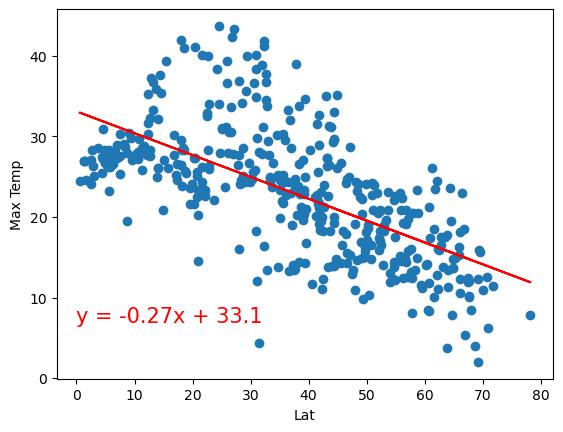

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (0,7))

The r-value is 0.7362952628496396


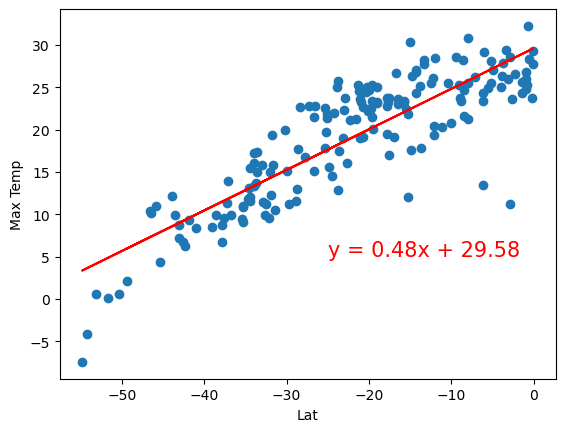

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (-25,5))

**Discussion about the linear relationship:**  From my observation, it seems that there is a opposing relationship between the Latitude and Longitude. 

### Humidity vs. Latitude Linear Regression Plot

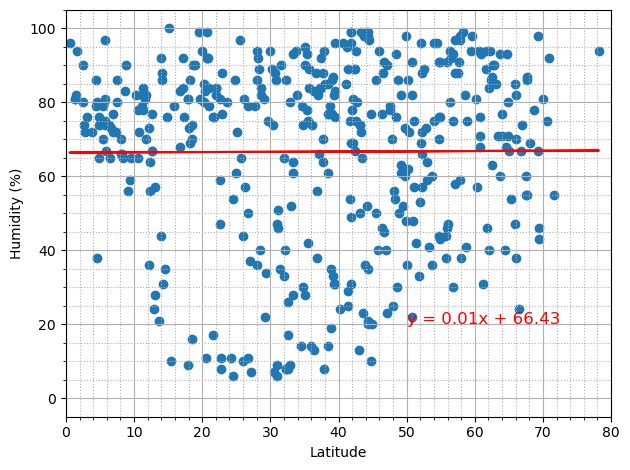

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

plt.tight_layout()
plt.show()

The r-value is 0.03393023340939339


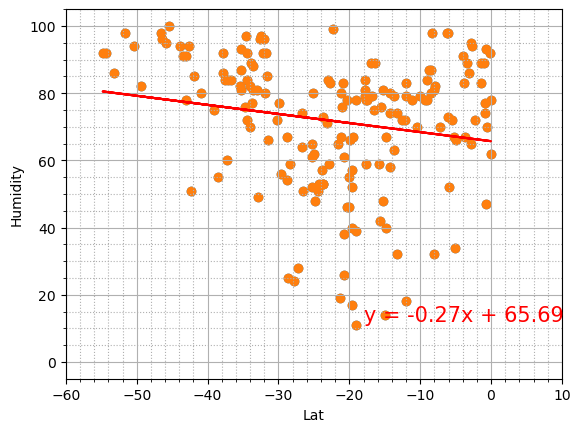

<Figure size 640x480 with 0 Axes>

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.xlim(-60, 10)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plot_linear_regression(x_values,y_values, "Humidity", (-18,12))
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**   From my observation, it seems that there is a opposing relationship between the Latitude and Longitude.

### Cloudiness vs. Latitude Linear Regression Plot

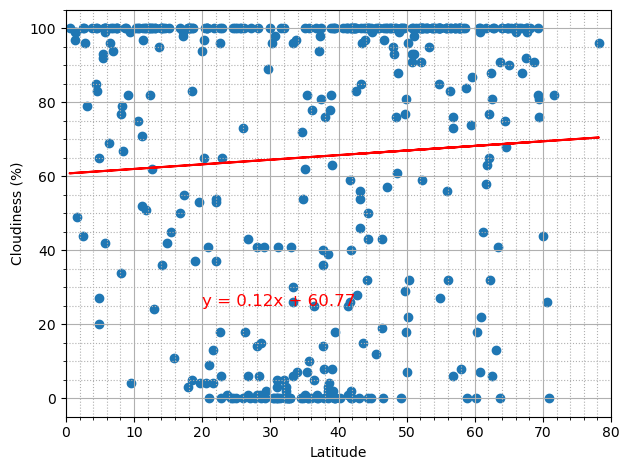

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

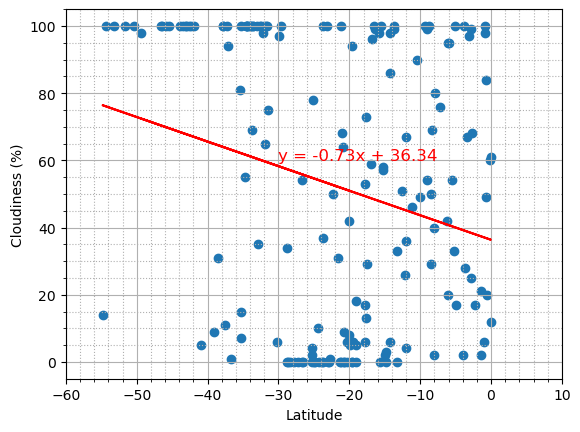

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 10)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**  From my observation, it seems that there is a opposing relationship between the Latitude and Longitude.

### Wind Speed vs. Latitude Linear Regression Plot

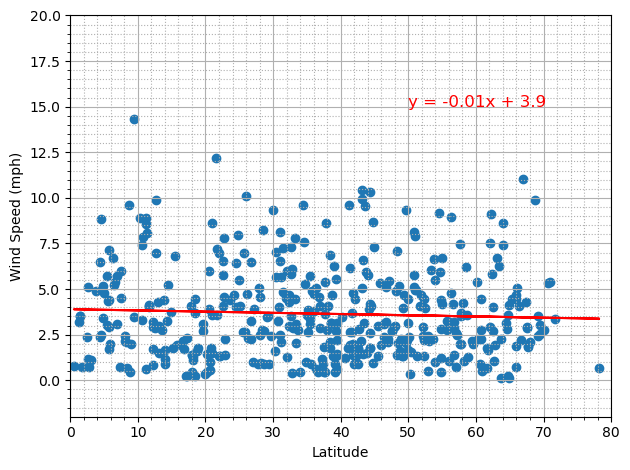

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2, 20)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

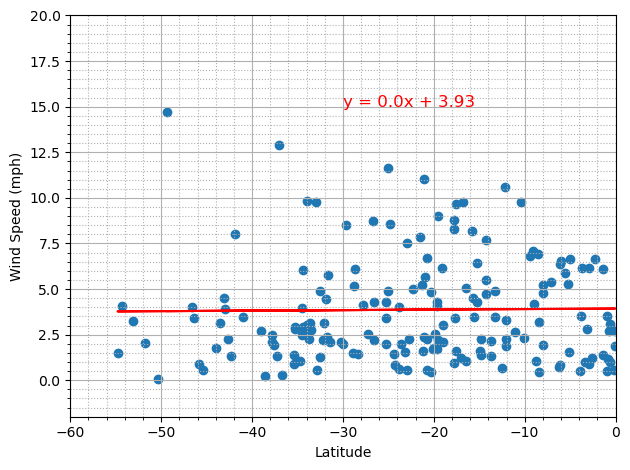

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2, 20)
plt.xlim(-60, 0)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**  From my observation, it seems that there is a opposing relationship between the Latitude and Longitude.